In [152]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import infotopo
import networkx as nx
import matplotlib.patches as patches
from sklearn.utils import Bunch
from itertools import combinations

Generate artificial networks with a preset redundancy and synergy. 

In [135]:
def generate_empty_simplicial_complex(num_nodes):
    """
    Generate a simplicial complex for a given number of nodes and weights zero.
    
    Parameters:
        num_nodes (int): The number of nodes.
        
    Returns:
        dict: A dictionary where keys are simplices (tuples) and values are zero.
    """
    if num_nodes <= 0:
        return {}

    # Initialize the dictionary to store simplices and their values
    simplicial_complex = {}
    nodes = range(1, num_nodes + 1)
    
    # Generate simplices and assign random values
    for r in range(1, num_nodes + 1):
        for simplex in combinations(nodes, r):
            simplicial_complex[simplex] = 0
    
    return simplicial_complex

In [146]:
def distribute_value(R_sum, S_sum, nb_of_variables):
    """
    Distribute a given value `R_sum` randomly into a list of length `nb_of_variables` 
    such that the sum of the list equals `R_sum`. Do the same for S_sum
    
    Parameters:
        R_sum (float): The sum of the positive MI values, representing redundant dependence.
        S_sum (float): The sum of the negative MI values, representing synergistic dependence.
        nb_of_variables (int): The amount of variables, i.e. nodes, of the system.
        
    Returns:
        list of float: A list of MI values, where sum(postive values)=R_sum and sum(negative values)=S_sum.
    """
    if nb_of_variables <= 0:
        return []

    nb_of_variables_R = random.randint(1, nb_of_variables - 1)
    nb_of_variables_S = nb_of_variables - nb_of_variables_R

    # Generate MI values for redundancy
    points_R = sorted([0] + [random.uniform(0, R_sum) for _ in range(nb_of_variables_R - 1)] + [R_sum])
    distributed_values_R = [points_R[i + 1] - points_R[i] for i in range(nb_of_variables_R)]

    # Generate MI values for synergy
    points_S = sorted([0] + [random.uniform(0, S_sum) for _ in range(nb_of_variables_S - 1)] + [S_sum])
    distributed_values_S = [-(points_S[i + 1] - points_S[i]) for i in range(nb_of_variables_S)]

    # Combine both lists
    distributed_values = distributed_values_R + distributed_values_S

    # Shuffle the combined list
    random.shuffle(distributed_values)

    return distributed_values

def assign_MI_values(simplicial_complex, R_sum, S_sum):
    """
    Assigns MI values to the components of the complex.
    For n=1: assign random MI values between 2 and 3
    For n=2: assign random MI values between 0 and 3
    For n>2: assign MI values from the resulting list of func "distribute_value"
    
    Parameters:
        R_sum (float): The sum of the positive MI values, representing redundant dependence.
        S_sum (float): The sum of the negative MI values, representing synergistic dependence.
        simplicial_complex (dict): Dictionary of the empty simplicial complex
        
    Returns:
        Simplicial complex (dict): resulting complex with assigned MI values
    """
    # Count the number of keys with length > 2
    count = sum(1 for key in simplicial_complex if len(key) > 2)

    # Get the distributed values for keys with length > 2
    distributed_values = distribute_value(R_sum, S_sum, count)

    # Iterator for distributing values to keys with length > 2
    distributed_values_iter = iter(distributed_values)

    # Iterate over the dictionary and assign values based on key length
    for key in simplicial_complex:
        key_length = len(key)
        
        if key_length == 1:
            # Assign random values between 2 and 3 for keylength 1
            simplicial_complex[key] = random.uniform(2, 3)
        elif key_length == 2:
            # Assign random values between 0 and 3 for keylength 2
            simplicial_complex[key] = random.uniform(0, 3)
        elif key_length > 2:
            # Assign randomly distributed redundancy and synergy values for keylength > 2
            simplicial_complex[key] = next(distributed_values_iter)
    
    return simplicial_complex

In [168]:
R_sum = 19
S_sum = 1
nb_of_variables = 10

empty_simplicial_complex = generate_empty_simplicial_complex(nb_of_variables)
Ninfomut_artificial = assign_MI_values(empty_simplicial_complex, R_sum, S_sum)

In [169]:
compute_tse_complexity(Ninfomut_artificial)

-4.120796384575847

In [182]:
TSE_R = []
TSE_S = []
TSE_0 = []

for i in range(4000):
    R_sum = 19
    S_sum = 1
    nb_of_variables = 10

    empty_simplicial_complex = generate_empty_simplicial_complex(nb_of_variables)
    Ninfomut_artificial = assign_MI_values(empty_simplicial_complex, R_sum, S_sum)
    TSE_R.append(compute_tse_complexity(Ninfomut_artificial))

    R_sum = 1
    S_sum = 19
    nb_of_variables = 10

    empty_simplicial_complex = generate_empty_simplicial_complex(nb_of_variables)
    Ninfomut_artificial = assign_MI_values(empty_simplicial_complex, R_sum, S_sum)
    TSE_S.append(compute_tse_complexity(Ninfomut_artificial))

    R_sum = 10
    S_sum = 10
    nb_of_variables = 10

    empty_simplicial_complex = generate_empty_simplicial_complex(nb_of_variables)
    Ninfomut_artificial = assign_MI_values(empty_simplicial_complex, R_sum, S_sum)
    TSE_0.append(compute_tse_complexity(Ninfomut_artificial))

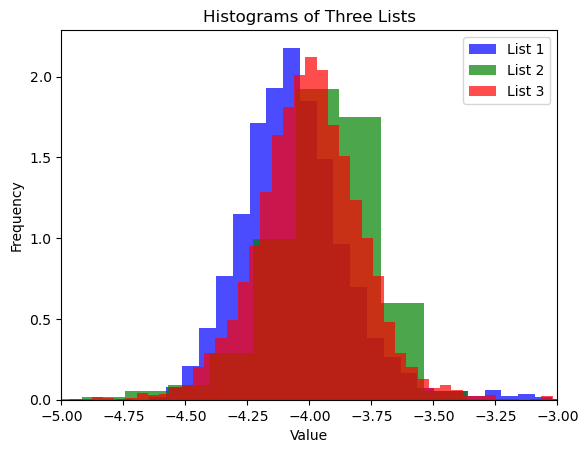

In [186]:
import matplotlib.pyplot as plt

# Sample data for three lists
list1 = TSE_R
list2 = TSE_S
list3 = TSE_0

# Plot histograms for the three lists
plt.hist(list1, bins=100, color='blue', alpha=0.7, label='List 1', density=True)
plt.hist(list2, bins=100, color='green', alpha=0.7, label='List 2', density=True)
plt.hist(list3, bins=100, color='red', alpha=0.7, label='List 3', density=True)
plt.xlim(-5, -3)

# Add title and labels
plt.title('Histograms of Three Lists')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add legend to distinguish the lists
plt.legend()

# Show the plot
plt.show()


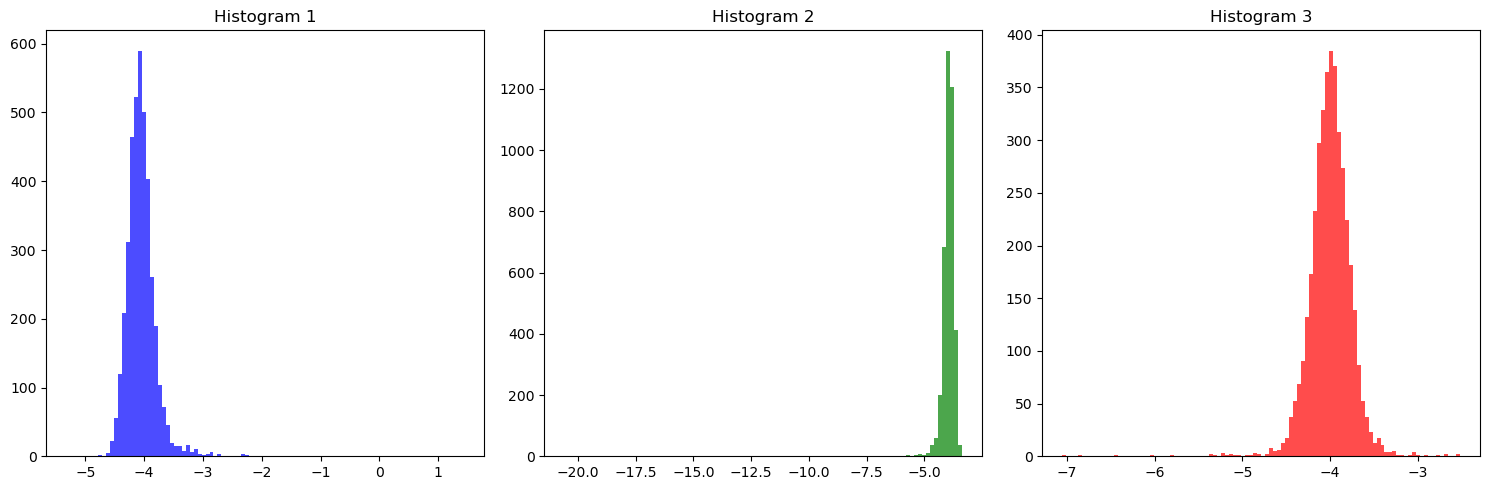

In [184]:
import matplotlib.pyplot as plt

# Sample data for three lists
list1 = TSE_R
list2 = TSE_S
list3 = TSE_0

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram for the first list
axs[0].hist(list1, bins=100, color='blue', alpha=0.7)
axs[0].set_title('Histogram 1')

# Plot histogram for the second list
axs[1].hist(list2, bins=100, color='green', alpha=0.7)
axs[1].set_title('Histogram 2')

# Plot histogram for the third list
axs[2].hist(list3, bins=100, color='red', alpha=0.7)
axs[2].set_title('Histogram 3')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [153]:
def compute_subset_tc_expectation(TC_dict, gamma):
    """
    Computes the expected total correlation for subsets of size gamma.
    
    Parameters:
        TC_dict (dict): Dictionary where keys are tuples (subsets) and values are total correlations.
        gamma (int): Size of the subset.
    
    Returns:
        float: Expected total correlation for subsets of size gamma.
    """
    subsets = [subset for subset in TC_dict if len(subset) == gamma]
    subset_tcs = [TC_dict[subset] for subset in subsets]
    return np.mean(subset_tcs) if subset_tcs else 0  # Return 0 if no subsets of size gamma exist

def compute_tse_complexity(TC_dict):
    """
    Computes the TSE complexity given a dictionary of total correlations.
    
    Parameters:
        TC_dict (dict): Dictionary of total correlations where keys are tuples (subsets).
        
    Returns:
        float: The TSE complexity.
    """
    N = max(len(subset) for subset in TC_dict)  # Maximum size of the subsets (full set)
    TSE = 0
    
    for gamma in range(1, N):
        TC_full = (gamma / N) * TC_dict[tuple(range(1, N + 1))]  # Full set correlation scaled by gamma/N
        E_TC_gamma = compute_subset_tc_expectation(TC_dict, gamma)
        TSE += TC_full - E_TC_gamma
    
    return TSE